# MATLAB to Julia Examples
This Jupyter notebook is intended to supplement the information in the 
[MATLAB to Julia Wiki](https://github.com/pbouffard/matlabtojulia/wiki).

The intended audience, like the wiki, is users who are already familiar with MATLAB
and are interested in learning Julia, particularly if they plan to port MATLAB code
to Julia and/or use Julia to replace MATLAB.

# Getting Started
This notebook is developed in Julia 0.7. As of this writing the IJulia package only works in Julia 0.7 if you check out the master branch. To do so, in the Julia REPL enter package mode with the `]` key and type `add IJulia#master`. After doing so you should be able to open this notebook in Jupyter after starting it with `using IJulia; notebook()`.

# First Steps
Let's start by printing out the version of Julia we're using:

In [1]:
using InteractiveUtils # avoid deprecation warning
versioninfo()

Julia Version 0.7.0-beta2.0
Commit b145832402* (2018-07-13 19:54 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i5-4258U CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, haswell)


Note the `using InteractiveUtils` command. In Julia 1.0 much functionality is being moved out of the `Base` library and into different modules in the standard library. In Julia 0.7 such commands will still work without the appropriate `using` statement but a deprecation warning will be emitted, such as:
```
WARNING: Base.versioninfo is deprecated: it has been moved to the standard library package `InteractiveUtils`.
Add `using InteractiveUtils` to your imports.
  likely near In[1]:1
```

Here the `using` statements are included before the first use of any such commands so that this notebook should be usable in Julia 1.0 when the deprecation warnings become errors.

The most recent returned value in the REPL can be accessed with `ans`, just as in MATLAB:

In [2]:
x = 2

2

In [3]:
ans

2

In Julia `typeof` is similar to MATLAB's `class`:

In [4]:
typeof(x)

Int64

But note that the default type in Julia is not `Float64` unlike MATLAB where `double` is the default. In fact the type of `x` in an assignment like `x = <literal>` will depend on what the literal is:

In [5]:
xint = 2
xfloat64 = 2.0
xrational = 4//2
xfloat32 = Float32(2)
xs = (xint, xfloat64, xrational, xfloat32)
typeof.(xs) # Note the dot -- vectorization syntax (see below)

(Int64, Float64, Rational{Int64}, Float32)

It seems that Julia has some interesting built-in types, such as [`Rational`](https://docs.julialang.org/en/latest/manual/complex-and-rational-numbers/#Rational-Numbers-1) for rational numbers.

Note that the `.` in `typeof.` uses a special Julia [syntax](https://docs.julialang.org/en/latest/manual/functions/#man-vectorized-1) that basically allows any function to be vectorized.

Let's try this with a newly-defined function. Note that in Julia you can define [functions](https://docs.julialang.org/en/latest/manual/functions/) in a very compact way, e.g.:

```julia
f(x, y) = x + y
```

Moreover certain mathematical expressions can be written more compactly because Julia allows for variables to be prefixed by literal constants, for example you can write `2x + 3y` which is treated identically to `2*x + 3*y`.

Julia also allows for Unicode in variable names, and the Julia REPL, Jupyter notebooks and most editors with Julia support allow easy entry of many of these using something similar to $\LaTeX$ syntax. For example to get the unicode π you enter `\pi` and then press the TAB key. This means that if you have a function that you'd write in math as $f(x) = 2x^2 + 5\pi$ then in Julia source it can look nearly identical:

In [6]:
f(x) = 2x^2 + 5π

f (generic function with 1 method)

In [7]:
f.(xs)

(23.707963267948966, 23.707963267948966, 23.707963267948966, 23.707963267948966)

In [8]:
typeof.(ans)

(Float64, Float64, Float64, Float64)

Well that was pretty cool. Notice that types get [promoted](https://docs.julialang.org/en/latest/manual/conversion-and-promotion/#Promotion-1) as necessary to evaluate a given expression:

In [9]:
(xrational^2, 5π, f(xrational))

(4//1, 15.707963267948966, 23.707963267948966)

Above notice that a rational number remains rational when raised to an integer power, but when added to a floating point number the result is necessarily floating point. If we raise to a power that is floating point then the result is floating point:

In [10]:
xrational^2.0

4.0

Interestingly Julia actually has an [`Irrational`](https://docs.julialang.org/en/latest/base/numbers/#Base.Irrational) type used for constants like $\pi$:

In [11]:
typeof(π)

Irrational{:π}

# Plotting
Let's go ahead and wade into a somewhat contentious subject in the Julia community. Julia's plotting ecosystem is, well, by the fact that I had to say 'ecosystem' you can tell that it's a bit complicated. It's also an ever-changing topic, especially at this writing when 1.0/0.7 is in beta and many libraries are not yet upgraded.

For now let's proceed using [PyPlot](https://github.com/JuliaPy/PyPlot.jl) which appears to work today (July 2018). PyPlot is an interface to the popular [Matplotlib](https://matplotlib.org/) Python package. Since Matplotlib's [pyplot](https://matplotlib.org/api/pyplot_summary.html) interface is modeled after MATLAB's plotting commands it will be familiar to MATLAB users.

In [12]:
# Install PyPlot if not already installed
using Pkg
try
    using PyPlot
catch
    println("PyPlot not installed, installing it...")
    pkg"add PyPlot"
    using PyPlot
end

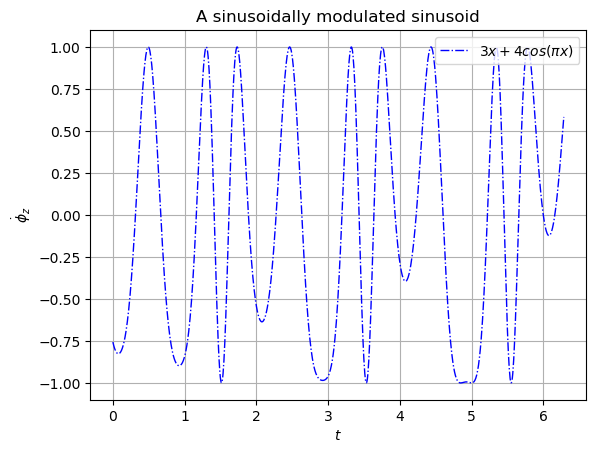

In [13]:
# Basic example of PyPlot usage
pygui(false)
function pyplotExample()
    x = range(0, stop=2*pi, length=1000)
    y = sin.(3x + 4cos.(π*x))
    fig = plot(x, y, color="blue", linewidth=1, linestyle="-.", label=L"3x + 4cos(\pi x)")
    grid()
    title("A sinusoidally modulated sinusoid")
    xlabel(L"t")
    ylabel(L"\dot\phi_z")
    legend(loc="upper right")
    return fig
end
pyplotExample();

In the above note the use of [LaTeX plot labels](https://github.com/JuliaPy/PyPlot.jl#latex-plot-labels) in the special string literals such as `L"\dot\phi_z"` which avoid the need to escape the `$` character.

PyPlot is great, though because most of the documentation that you'll need is actually in the Matplotlib documentation and naturally geared towards users accessing it conventionally via Python, it can be tricky to figure out exactly how to translate a given example from Python to Julia. Generally speaking, most functionality is documented on the single documentation page for the [PyPlot API](https://matplotlib.org/api/pyplot_api.html) and searching here usually finds the relevant information. For example, for the `plot` function, searching on that page for `matplotlib.pyplot.plot` comes up with this [result](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

## Interacting with plots
PyPlot output in Jupyter notebooks is static, but it is possible to plot to a separate window with interactive controls:

In [18]:
pygui(true)
pyplotExample();

Try zooming/panning in the interactive window before executing the following cell (don't close the other window first, though):

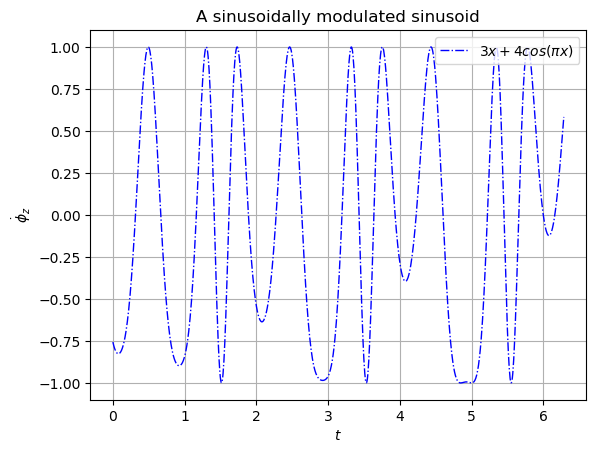

false

In [19]:
display(gcf()) # "pastes" the view from the interactive external window
pygui(false) # closes the external plotting window